In [3]:
from lightkurve import TessTargetPixelFile
import lightkurve as lk
tpf = TessTargetPixelFile("C:\\Users\\Administrator\\Documents\\TIC 62020444\\MAST_2023-02-09T1209\\MAST_2023-02-09T1209\\TESS\\tess2019169103026-s0013-0000000062020444-0146-s\\tess2019169103026-s0013-0000000062020444-0146-s_tp.fits")
tpf

TessTargetPixelFile(TICID: 62020444)

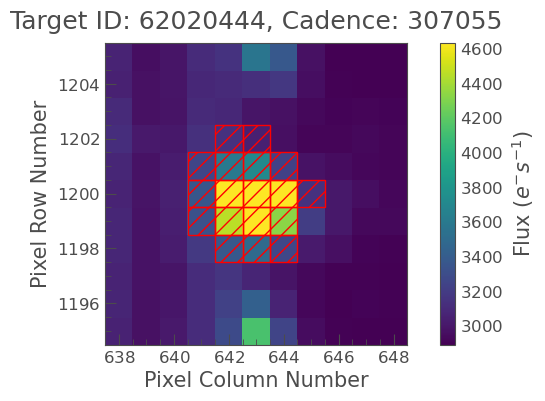

In [26]:
tpf.plot(aperture_mask=tpf.pipeline_mask);

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

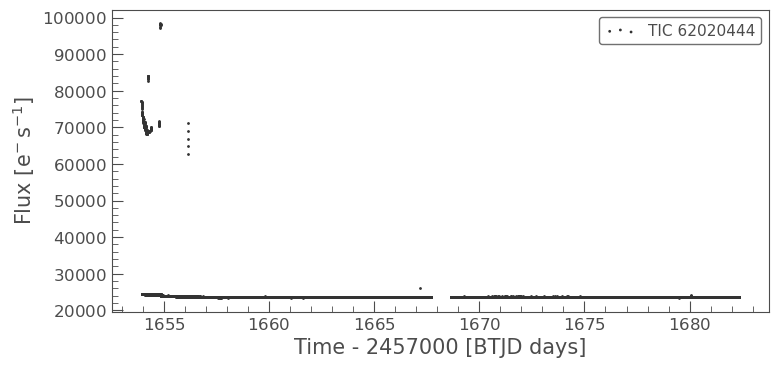

In [25]:
lc = tpf.to_lightcurve()
lc.scatter()

In [10]:
tpf.create_threshold_mask(threshold=1)

array([[False, False, False, False,  True,  True,  True, False, False,
        False, False],
       [False, False, False, False,  True,  True,  True, False, False,
        False, False],
       [False, False, False, False,  True,  True, False, False, False,
        False, False],
       [False, False, False,  True,  True,  True,  True,  True, False,
        False, False],
       [False, False, False,  True,  True,  True,  True,  True,  True,
        False, False],
       [False, False, False,  True,  True,  True,  True,  True,  True,
        False, False],
       [False, False, False,  True,  True,  True,  True, False, False,
        False, False],
       [False, False, False, False,  True,  True, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, Fal

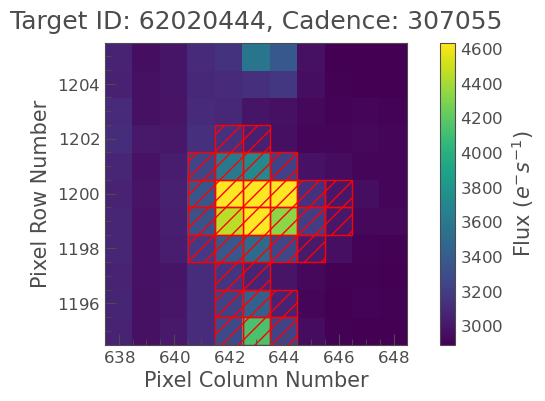

In [12]:
tpf.plot(aperture_mask=tpf.create_threshold_mask(threshold=1));

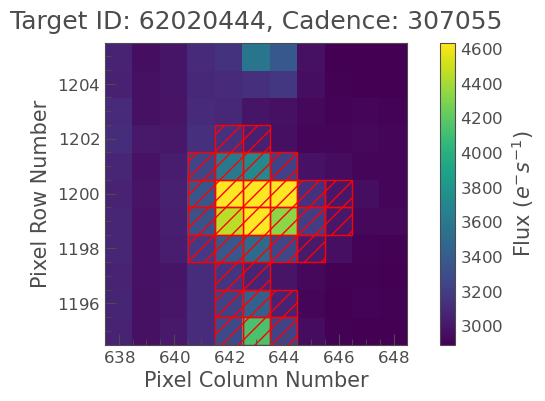

In [14]:
custom_mask = tpf.create_threshold_mask(threshold=1, reference_pixel=(0,0))
tpf.plot(aperture_mask=custom_mask);

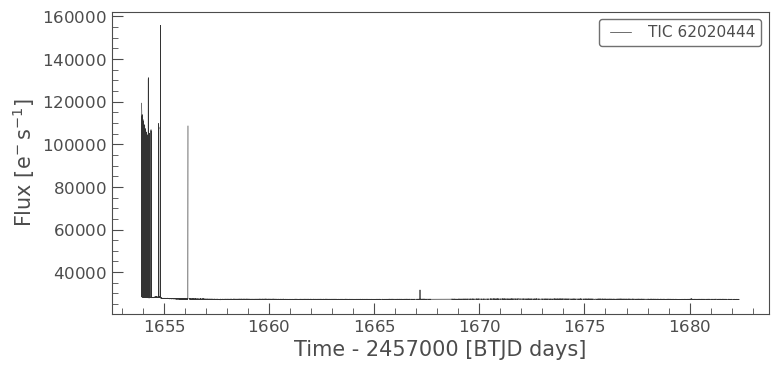

In [15]:
lc1 = tpf.to_lightcurve(aperture_mask=custom_mask)

<AxesSubplot:title={'center':'Target ID: 62020444, Cadence: 307055'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

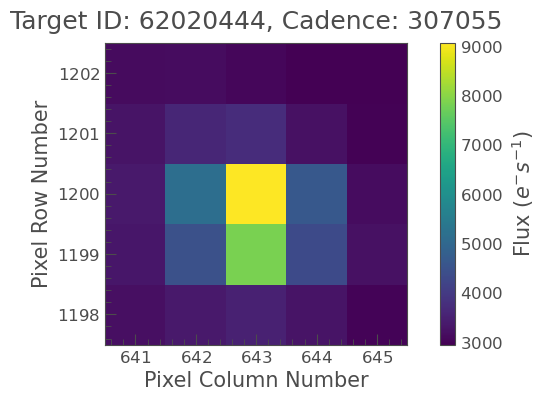

In [19]:
tpf_cut = tpf.cutout(center=(6,6))
tpf_cut.plot()

In [20]:
tpf_cut.create_threshold_mask(threshold=1)

array([[False, False, False, False, False],
       [False,  True,  True,  True, False],
       [False,  True,  True,  True, False],
       [False,  True,  True, False, False],
       [False, False, False, False, False]])

In [21]:
import numpy as np
cut_mask = np.zeros(tpf_cut[0].shape[1:], dtype='bool')
cut_mask[1:4,2] = True
cut_mask[1:4,1] = True
cut_mask[1:4,3] = True

cut_mask

array([[False, False, False, False, False],
       [False,  True,  True,  True, False],
       [False,  True,  True,  True, False],
       [False,  True,  True,  True, False],
       [False, False, False, False, False]])

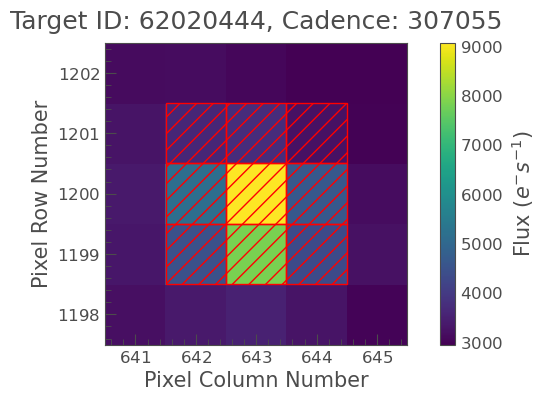

In [22]:
tpf_cut.plot(aperture_mask=cut_mask);

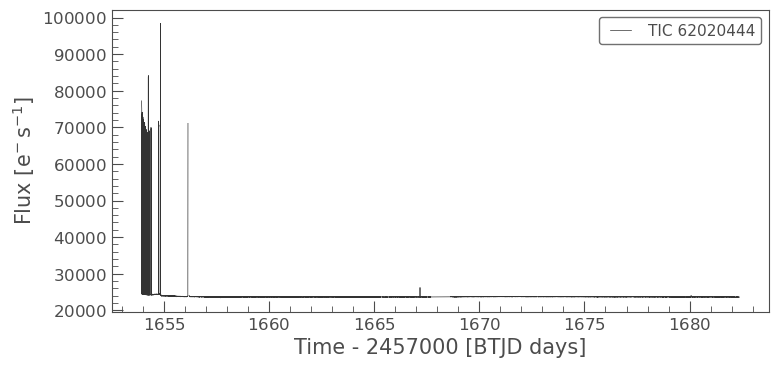

In [24]:
lc = tpf.to_lightcurve()
lc.plot();

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

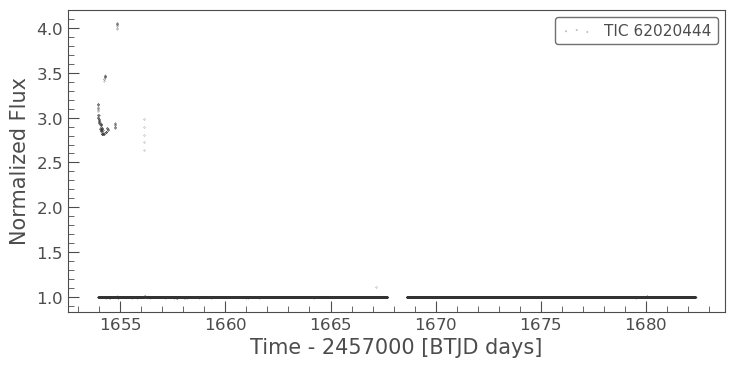

In [8]:
flat_lc = lc.flatten()
flat_lc.scatter(s=0.1)